In [101]:
import numpy as np

In [102]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [103]:
data_stat = np.load('../../data/fluxonium/static_spectrum_wq=0.03.npz')

data_ad = np.load('../../data/fluxonium/floquet_spectrum/w_r=44.0_N_rep=15_n_states=20_dim=110.npz')
data_diab = np.load('../../data/fluxonium/floquet_spectrum/w_r=46.0_N_rep=15_n_states=20_dim=110.npz')

data = [data_ad, data_diab]

evals = []

wr = []

ref_static, A_list, wq = data_stat['evals'], data_stat['e0_list'], data_stat['wq']

for j in range(2):
    evals.append(data[j]['evals_list'])
    wr.append(data[j]['w_r'])
    N_replicas = data[j]['N_replicas']

reff = ref_static[int((np.shape(ref_static)[0]-1)/2),0]

ref_static = ref_static - np.min(reff)

for idx in range(2):
    for j in range(3):
        evals[idx][j] = evals[idx][j] - np.min(reff)

In [104]:
data = np.load('../../data/fluxonium/g_parallel/N_rep=15_n_states=20_dim=110_num_w=101.npz', allow_pickle=True)

Alist, wlist, g_parallel = data['Alist'], data['wlist'], data['g_parallel']

In [105]:
data_ad = np.load('../../data/fluxonium/single_case/A_q=0.8_w_d=44.0_w_d_disp=44.0_N_fock=8_N_rep=5_n_states=8_dim=110_compensation=True_dispersive=False.npz')
data_diab = np.load('../../data/fluxonium/single_case/A_q=0.8_w_d=46.0_w_d_disp=46.0_N_fock=8_N_rep=5_n_states=8_dim=110_compensation=True_dispersive=False.npz')

data = [data_ad, data_diab]

exp_a = [[],[]]
exp_a_an = [[],[]]

for idx in range(2):
    exp_a[idx], exp_a_an[idx], tlist, A_Q, g, kappa, w_ad, wq = data[idx]['exp_a'], \
    data[idx]['exp_a_an'], data[idx]['tlist'], data[idx]['A_q'], data[idx]['g'], data[idx]['kappa'], data[idx]['w'], data[idx]['wq']

In [106]:
data_n_operator = np.load('../../data/params/fluxonium.npz', allow_pickle=True)

drive_op = data_n_operator['drive_op']
H_sys = data_n_operator['H_sys']

In [107]:
omega_03 = H_sys[3,3] - H_sys[0,0]

 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/collections.py: 197ComplexWarning: Casting complex values to real discards the imaginary part
 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/collections.py: 1403ComplexWarning: Casting complex values to real discards the imaginary part
 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/cbook.py: 1762ComplexWarning: Casting complex values to real discards the imaginary part
 /nobackup/my_python2/lib/python3.9/site-packages/matplotlib/cbook.py: 1398UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
 /tmp/ipykernel_26069/1410102962.py: 435UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
 /tmp/ipykernel_26069/1410102962.py: 446UserWarning: The figure layout has changed to tight
 /tmp/ipykernel_26069/1410102962.py: 446

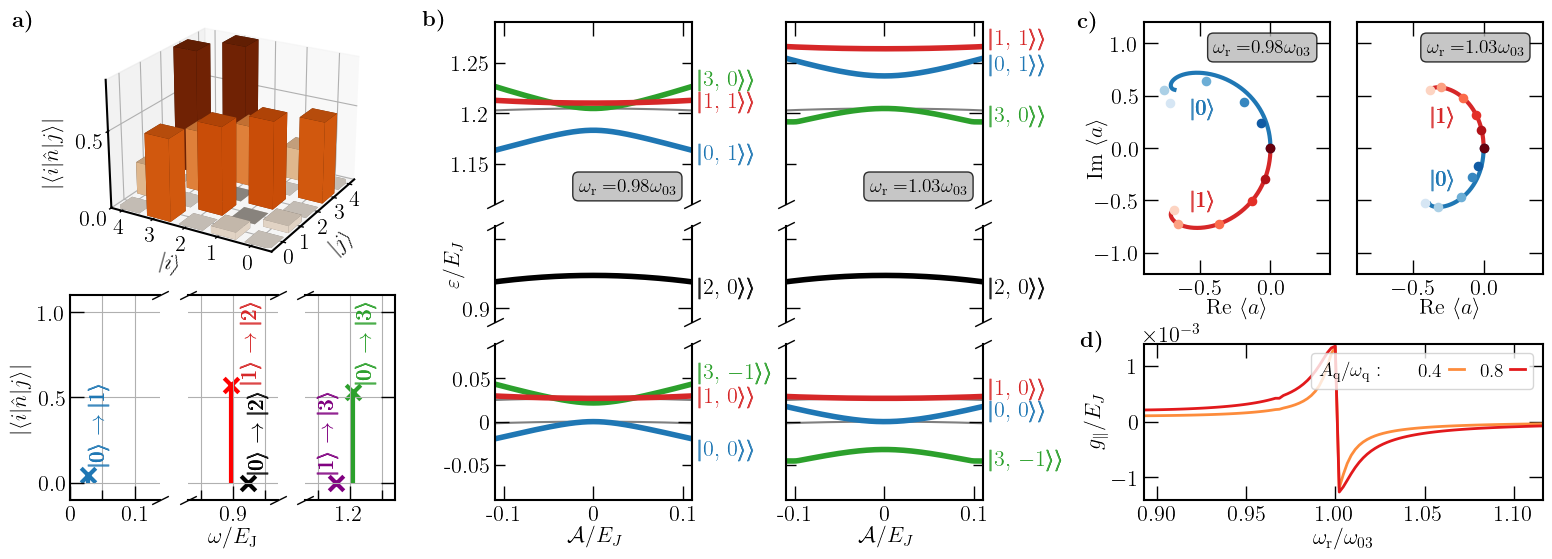

In [108]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scqubits.utils.plot_utils import (
    color_normalize,
)
from matplotlib import collections as matcoll

cmap = mpl.colormaps["tab10"]

%matplotlib inline

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(19,6.2), layout="constrained")

gs0 = gridspec.GridSpec(6, 11, figure=fig, height_ratios=[0.33,0.03,0.05,0.01,0.06,0.35], width_ratios=[0.16,0.16,0.16,0.08,0.35,0.07,0.35,0.1,0.04,0.33,0.33], hspace=0.35, wspace=0.25)

axes = fig.add_subplot(gs0[0:3,0:3], projection="3d")
ax_matrix_el_0 = fig.add_subplot(gs0[4:6,0])
ax_matrix_el_1 = fig.add_subplot(gs0[4:6,1])
ax_matrix_el_2 = fig.add_subplot(gs0[4:6,2])

ax_floquet_ad_up = fig.add_subplot(gs0[0:2,4])
ax_floquet_ad_middle = fig.add_subplot(gs0[2:5,4])
ax_floquet_ad_down = fig.add_subplot(gs0[5:7,4])

ax_floquet_diab_up = fig.add_subplot(gs0[0:2,6])
ax_floquet_diab_middle = fig.add_subplot(gs0[2:5,6])
ax_floquet_diab_down = fig.add_subplot(gs0[5:7,6])

ax_floquet_up = [ax_floquet_ad_up, ax_floquet_diab_up]
ax_floquet_middle = [ax_floquet_ad_middle, ax_floquet_diab_middle]
ax_floquet_down = [ax_floquet_ad_down, ax_floquet_diab_down]

ax_IQ_ad = fig.add_subplot(gs0[0:4,9])
ax_IQ_diab = fig.add_subplot(gs0[0:4,10])

ax_IQ = [ax_IQ_ad, ax_IQ_diab]

ax_g_parallel = fig.add_subplot(gs0[5,9:11])

################### n_operator ##################################
matrix = drive_op[0:5,0:5]

mode = "abs"

y_count, x_count = matrix.shape  # We label the columns as "x", while rows as "y"
element_count = x_count * y_count  # total num. of elements to plot

xgrid, ygrid = np.meshgrid(range(x_count), range(y_count))
xgrid = xgrid.flatten()
ygrid = ygrid.flatten()

zbottom = np.zeros(element_count)  # all bars start at z=0
dx, dy = 0.75, 0.75  # width of bars in x and y directions

modefunction = np.abs
zheight = modefunction(matrix).flatten()  # height of bars from matrix elements

min_zheight, max_zheight, nrm = color_normalize(zheight, mode)
colors = plt.cm.Oranges(nrm(zheight))  # list of colors for each bar

# skyscraper plot
axes.view_init(azim=210, elev=23)
axes.bar3d(xgrid, ygrid, zbottom, dx, dy, zheight, color=colors)

if mode in ["real", "imag"]:
    min_zheight = 0 if min_zheight > 0 else min_zheight
    max_zheight = 0 if max_zheight < 0 else max_zheight

if min_zheight == max_zheight:
    # pad with small values so we don't get warnings
    max_zheight += 0.0000001

axes.set_zlim3d([min_zheight, max_zheight])

for axis, locs in [
    (axes.xaxis, np.arange(x_count)),
    (axes.yaxis, np.arange(y_count)),
]:
    axis.set_ticks(locs + 0.5, minor=True)
    axis.set(ticks=locs + 0.5, ticklabels=locs)

axes.tick_params(axis="x", pad=-5)
axes.tick_params(axis="y", pad=-5)
axes.tick_params(axis="z", pad=-2)

axes.set_xlabel(r"$\vert j \rangle$", labelpad=-6.5)
axes.set_ylabel(r"$\vert i \rangle$", labelpad=-6.5)
axes.zaxis.set_rotate_label(False)  # disable automatic rotation
axes.set_zlabel(r'$\vert \langle i \vert \hat{n} \vert j \rangle \vert$', labelpad=-3, rotation=90)

axes.set_box_aspect(None, zoom=1.25)

x_0 = [H_sys[1,1]-H_sys[0,0]]
y_0 = [np.abs(drive_op[0,1])]

COLORS = ['tab:blue']

lines = []
for i in range(len(x_0)):
    ax_matrix_el_0.scatter(x_0[i], y_0[i], marker='x', s=110, facecolors=COLORS[i], linewidths=3)
    pair=[(x_0[i],0), (x_0[i], y_0[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors=[COLORS[0]], linewidth=3)
ax_matrix_el_0.add_collection(linecoll) 

x_1 = [H_sys[2,2]-H_sys[1,1], H_sys[2,2]-H_sys[0,0]]
y_1 = [np.abs(drive_op[1,2]), np.abs(drive_op[0,2])]

COLORS = ['red', 'black']

lines = []
for i in range(len(x_1)):
    ax_matrix_el_1.scatter(x_1[i], y_1[i], marker='x', s=110, facecolors=COLORS[i], linewidths=3)
    pair=[(x_1[i],0), (x_1[i], y_1[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors=[COLORS[0],COLORS[1]], linewidth=3)
ax_matrix_el_1.add_collection(linecoll) 

x_2 = [H_sys[3,3]-H_sys[0,0], H_sys[3,3]-H_sys[1,1]]
y_2 = [np.abs(drive_op[0,3]), np.abs(drive_op[1,3])]

COLORS = ['tab:green', 'purple']

lines = []
for i in range(len(x_2)):
    ax_matrix_el_2.scatter(x_2[i], y_2[i], marker='x', s=110, facecolors=COLORS[i], linewidths=3)
    pair=[(x_2[i],0), (x_2[i], y_2[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors=[COLORS[0],COLORS[1]], linewidth=3)
ax_matrix_el_2.add_collection(linecoll) 

ax_matrix_el_0.grid(which='both')
ax_matrix_el_1.grid(which='both')
ax_matrix_el_2.grid(which='both')

ax_matrix_el_1.set_xlabel(r'$\omega/E_{\rm J}$')
ax_matrix_el_0.set_ylabel(r'$\vert \langle i \vert \hat{n} \vert j \rangle \vert$')

ax_matrix_el_0.set_xlim([0.0,0.14])
ax_matrix_el_1.set_xlim([0.83,0.97])
ax_matrix_el_2.set_xlim([1.13,1.27])

ax_matrix_el_0.set_ylim([-0.1,1.1])
ax_matrix_el_1.set_ylim([-0.1,1.1])
ax_matrix_el_2.set_ylim([-0.1,1.1])

ax_matrix_el_0.set_xticks([0,0.1], ['0', '0.1'])
ax_matrix_el_1.set_xticks([0.9], ['0.9'])
ax_matrix_el_2.set_xticks([1.2], ['1.2'])

ax_matrix_el_0.set_xticks([0,0.05,0.1], minor=True)
ax_matrix_el_1.set_xticks([0.85,0.95], minor=True)
ax_matrix_el_2.set_xticks([1.15,1.25], minor=True)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
            linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax_matrix_el_0.plot([1, 1], [1, 0], transform=ax_matrix_el_0.transAxes, **kwargs)
ax_matrix_el_1.plot([0, 0], [1, 0], transform=ax_matrix_el_1.transAxes, **kwargs)
ax_matrix_el_1.plot([1, 1], [1, 0], transform=ax_matrix_el_1.transAxes, **kwargs)
ax_matrix_el_2.plot([0, 0], [1, 0], transform=ax_matrix_el_2.transAxes, **kwargs)

ax_matrix_el_0.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_matrix_el_1.tick_params(top=False, bottom=True, left=False, right=False, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_matrix_el_2.tick_params(top=False, bottom=True, left=False, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_matrix_el_0.xaxis.set_tick_params(direction="in", which='both')
ax_matrix_el_1.xaxis.set_tick_params(direction="in", which='both')
ax_matrix_el_2.xaxis.set_tick_params(direction="in", which='both')

ax_matrix_el_0.yaxis.set_tick_params(direction="in", which='both')
ax_matrix_el_1.yaxis.set_tick_params(direction="in", which='both')
ax_matrix_el_2.yaxis.set_tick_params(direction="in", which='both')

ax_matrix_el_0.spines.right.set_visible(False)
ax_matrix_el_1.spines.left.set_visible(False)
ax_matrix_el_1.spines.right.set_visible(False)
ax_matrix_el_2.spines.left.set_visible(False)

ax_matrix_el_0.text(0.44, 0.59, r'$\pmb{\left\vert 0 \right\rangle}\rightarrow\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el_0.transAxes, color = 'tab:blue', rotation=90)
ax_matrix_el_1.text(0.82, 0.99, r'$\pmb{\left\vert 1 \right\rangle}\rightarrow\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el_1.transAxes, color = 'tab:red', rotation=90)
ax_matrix_el_1.text(0.9, 0.55, r'$\pmb{\left\vert 0 \right\rangle}\rightarrow\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el_1.transAxes, color = 'black', rotation=90)
ax_matrix_el_2.text(0.795, 0.99, r'$\pmb{\left\vert 0 \right\rangle}\rightarrow\pmb{\left\vert 3 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el_2.transAxes, color = 'tab:green', rotation=90)
ax_matrix_el_2.text(0.38, 0.55, r'$\pmb{\left\vert 1 \right\rangle}\rightarrow\pmb{\left\vert 3 \right\rangle}$', ha='right', va='top', transform=ax_matrix_el_2.transAxes, color = 'purple', rotation=90)

################### Spectrum ##################################
for idx in range(2):
    ax_floquet_down[idx].plot(A_list, ref_static[:,0], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_down[idx].plot(A_list, ref_static[:,1], c='black', zorder=0, alpha=0.5, ls='-')
    
    ax_floquet_up[idx].plot(A_list, ref_static[:,2], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_up[idx].plot(A_list, ref_static[:,3], c='black', zorder=0, alpha=0.5, ls='-')

    for j,current_replica in enumerate(N_replicas):
        ax_floquet_down[idx].plot(A_list, evals[idx][j][:,0], zorder=1, lw=4, c='tab:blue')
        ax_floquet_down[idx].plot(A_list, evals[idx][j][:,1], zorder=1, lw=4, c='tab:red')
        ax_floquet_down[idx].plot(A_list, evals[idx][j][:,2], zorder=1, lw=4, c='black', alpha=1)
        ax_floquet_down[idx].plot(A_list, evals[idx][j][:,3], zorder=1, lw=4, c='tab:green', alpha=1)

        ax_floquet_middle[idx].plot(A_list, evals[idx][j][:,0], zorder=1, lw=4, c='tab:blue')
        ax_floquet_middle[idx].plot(A_list, evals[idx][j][:,1], zorder=1, lw=4, c='tab:red')
        ax_floquet_middle[idx].plot(A_list, evals[idx][j][:,2], zorder=1, lw=4, c='black', alpha=1)
        ax_floquet_middle[idx].plot(A_list, evals[idx][j][:,3], zorder=1, lw=4, c='tab:green', alpha=1)

        ax_floquet_up[idx].plot(A_list, evals[idx][j][:,0], zorder=1, lw=4, c='tab:blue')
        ax_floquet_up[idx].plot(A_list, evals[idx][j][:,1], zorder=1, lw=4, c='tab:red')
        ax_floquet_up[idx].plot(A_list, evals[idx][j][:,2], zorder=1, lw=4, c='black', alpha=1)
        ax_floquet_up[idx].plot(A_list, evals[idx][j][:,3], zorder=1, lw=4, c='tab:green', alpha=1)

        if current_replica < 0 :        
            string_current_replica = r'$-$'+str(np.abs(current_replica))
            offset = 0.041
        else :
            string_current_replica = str(np.abs(current_replica))
            offset = 0.033

        if idx == 0:
            if current_replica == 1:
                ax_floquet_up[idx].text(A_list[-1]+offset, evals[idx][j][:,0][-1], r'$\pmb{\vert}$'+'$0$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:blue')
                ax_floquet_up[idx].text(A_list[-1]+offset, evals[idx][j][:,1][-1]-0.01, r'$\pmb{\vert}$'+'$1$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:red')
            if current_replica == 0:
                ax_floquet_down[idx].text(A_list[-1]+offset, evals[idx][j][:,0][-1]-0.01, r'$\pmb{\vert}$'+'$0$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:blue')
                ax_floquet_down[idx].text(A_list[-1]+offset, evals[idx][j][:,1][-1]-0.01, r'$\pmb{\vert}$'+'$1$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:red')
                ax_floquet_up[idx].text(A_list[-1]+offset, evals[idx][j][:,3][-1]-0.01, r'$\pmb{\vert}$'+'$3$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:green')
                ax_floquet_middle[idx].text(A_list[-1]+offset, evals[idx][j][:,2][-1]-0.005, r'$\pmb{\vert}$'+'$2$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='black')
            if current_replica == -1:
                ax_floquet_down[idx].text(A_list[-1]+offset+0.011, evals[idx][j][:,3][-1]-0.005, r'$\pmb{\vert}$'+'$3$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:green')

        if idx == 1:
            if current_replica == 1:
                ax_floquet_up[idx].text(A_list[-1]+offset, evals[idx][j][:,0][-1]-0.022, r'$\pmb{\vert}$'+'$0$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:blue')
                ax_floquet_up[idx].text(A_list[-1]+offset, evals[idx][j][:,1][-1], r'$\pmb{\vert}$'+'$1$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:red')
            if current_replica == 0:
                ax_floquet_down[idx].text(A_list[-1]+offset, evals[idx][j][:,0][-1]-0.022, r'$\pmb{\vert}$'+'$0$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:blue')
                ax_floquet_down[idx].text(A_list[-1]+offset, evals[idx][j][:,1][-1], r'$\pmb{\vert}$'+'$1$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:red')
                ax_floquet_up[idx].text(A_list[-1]+offset, evals[idx][j][:,3][-1], r'$\pmb{\vert}$'+'$3$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:green')
                ax_floquet_middle[idx].text(A_list[-1]+offset, evals[idx][j][:,2][-1]-0.005, r'$\pmb{\vert}$'+'$2$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='black')
            if current_replica == -1:
                ax_floquet_down[idx].text(A_list[-1]+offset+0.011, evals[idx][j][:,3][-1]-0.005, r'$\pmb{\vert}$'+'$3$'+', '+string_current_replica+r'$\pmb{\rangle\rangle}$', ha='right', \
                                    size=16, c='tab:green')

    ax_floquet_up[idx].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_up[idx].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet_middle[idx].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_middle[idx].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet_down[idx].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_down[idx].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet_down[idx].set_xlabel(r'$\mathcal{A}/E_J$', labelpad=1)
    ax_floquet_up[idx].text(0.92, 0.07, r'$\omega_{\text{r}}=$'+str(np.round(wr[idx]/np.real(omega_03),2))+r'$\omega_{03}$', ha='right', bbox=props, \
               transform=ax_floquet_up[idx].transAxes, size=14)

    ax_floquet_down[idx].set_xlim([-0.11,0.11])
    ax_floquet_down[idx].set_ylim([-0.09,0.09])

    ax_floquet_middle[idx].set_xlim([-0.11,0.11])
    ax_floquet_middle[idx].set_ylim([0.89,0.96])

    ax_floquet_up[idx].set_xlim([-0.11,0.11])
    ax_floquet_up[idx].set_ylim([1.11,1.29])

    ax_floquet_down[idx].set_xticks([-0.1,0.0,0.1],['-0.1','0','0.1'])
    ax_floquet_down[idx].set_yticks([0.0],['0'])
    ax_floquet_down[idx].set_yticks([-0.05,0.05], ['-0.05','0.05'], minor=True)

    ax_floquet_middle[idx].set_yticks([0.9],['0.9'])
    ax_floquet_middle[idx].set_yticks([0.95], minor=True)

    ax_floquet_up[idx].set_yticks([1.2],['1.2'])
    ax_floquet_up[idx].set_yticks([1.15,1.25], ['1.15','1.25'], minor=True)

    ax_floquet_up[idx].spines.bottom.set_visible(False)
    ax_floquet_middle[idx].spines.top.set_visible(False)
    ax_floquet_middle[idx].spines.bottom.set_visible(False)
    ax_floquet_down[idx].spines.top.set_visible(False)

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax_floquet_up[idx].plot([0, 1], [0, 0], transform=ax_floquet_up[idx].transAxes, **kwargs)
    ax_floquet_middle[idx].plot([0, 1], [0, 0], transform=ax_floquet_middle[idx].transAxes, **kwargs)
    ax_floquet_middle[idx].plot([0, 1], [1, 1], transform=ax_floquet_middle[idx].transAxes, **kwargs)
    ax_floquet_down[idx].plot([0, 1], [1, 1], transform=ax_floquet_down[idx].transAxes, **kwargs)

ax_floquet_down[0].tick_params(top=False, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet_down[1].tick_params(top=False, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_floquet_middle[0].tick_params(top=False, bottom=False, left=True, right=True, labelleft=True,
                  labelbottom=False, labelright=False, labeltop=False, which='both')
ax_floquet_middle[1].tick_params(top=False, bottom=False, left=True, right=True, labelleft=False,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

ax_floquet_up[0].tick_params(top=True, bottom=False, left=True, right=True, labelleft=True,
                  labelbottom=False, labelright=False, labeltop=False, which='both')
ax_floquet_up[1].tick_params(top=True, bottom=False, left=True, right=True, labelleft=False,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

ax_floquet_down[0].set_ylabel(r'$\varepsilon/E_J$', labelpad=-1)

################### IQ ##################################
x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

qubit_state_list = [0,1]

dictionary = {}

for idxx in range(2):
    ax_IQ[idxx].plot(exp_a_an[idxx][0].real,exp_a_an[idxx][0].imag, c='tab:blue', lw=3)
    ax_IQ[idxx].plot(exp_a_an[idxx][1].real,exp_a_an[idxx][1].imag, c='tab:red', lw=3)

    for q_idx,qubit_state in enumerate(qubit_state_list):

        for index,i in enumerate(x_list):
            idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]
            
            if q_idx == 0:
                point_blue = ax_IQ[idxx].scatter(exp_a[idxx][q_idx][idx].real, exp_a[idxx][q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
                dictionary[f'point_blue_{index}'] = point_blue
            else:
                point_red = ax_IQ[idxx].scatter(exp_a[idxx][q_idx][idx].real, exp_a[idxx][q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
                dictionary[f'point_red_{index}'] = point_red

    ax_IQ[idxx].xaxis.set_tick_params(direction="in", which='both')
    ax_IQ[idxx].yaxis.set_tick_params(direction="in", which='both')

    ax_IQ[idxx].set_ylim([-1.2,1.2])
    ax_IQ[idxx].set_xlim([-0.9,0.42])

    legend_list = []
    legend_list_name = []
    for iindex, ii in enumerate(x_list):
        legend_list.append((dictionary[f'point_blue_{iindex}'], dictionary[f'point_red_{iindex}']))
        if iindex == 1:
            legend_list_name.append('.5')
        else:
            legend_list_name.append(f'{ii}')

    ax_IQ[idxx].set_xlabel(r'Re $\langle a \rangle$', labelpad=-1)

    ax_IQ[idxx].text(0.9, 0.88, r'$\omega_{\text{r}}=$'+str(np.round(wr[idxx]/np.real(omega_03),2))+r'$\omega_{03}$', ha='right', bbox=props, \
               transform=ax_IQ[idxx].transAxes, size=14)

ax_IQ[0].text(0.4,0.7,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_IQ[0].transAxes, color = 'tab:blue', \
        fontsize=16)
ax_IQ[0].text(0.4,0.335,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_IQ[0].transAxes, color = 'tab:red', \
        fontsize=16)
        
ax_IQ[1].text(0.54,0.67,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_IQ[1].transAxes, color = 'tab:red', \
        fontsize=16)
ax_IQ[1].text(0.54,0.42,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_IQ[1].transAxes, color = 'tab:blue', \
        fontsize=16)

ax_IQ[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                labelbottom=True, labelright=False, labeltop=False, which='both')
ax_IQ[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                labelbottom=True, labelright=False, labeltop=False, which='both')

ax_IQ[0].set_ylabel(r'Im $\langle a \rangle$', labelpad=-10)

########## g_parallel #####################
cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,2)
colors = cmap_plot(norm([i for i in range(len(Alist))]))

for idx, A_Q in enumerate(Alist[0:2]):
    ax_g_parallel.plot(wlist/omega_03, g_parallel[:,idx], label=np.round(A_Q/wq,2), color=colors[idx], lw=2)

ax_g_parallel.xaxis.set_tick_params(direction="in", which='both')
ax_g_parallel.yaxis.set_tick_params(direction="in", which='both')

ax_g_parallel.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_g_parallel.set_ylabel(r'$g_\parallel/E_J$', labelpad=2)

import matplotlib.ticker as mticker

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))

ax_g_parallel.yaxis.set_major_formatter(formatter)

ax_g_parallel.set_ylim([-0.0014,0.0014])

ax_g_parallel.set_xlabel(r'$\omega_{\rm r}/\omega_{03}$', labelpad=2)

h, l = ax_g_parallel.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = [r'$A_{\text{q}}/\omega_{\text{q}}:$'] + l  # Merging labels
leg = ax_g_parallel.legend(handles, labels, fontsize="14", loc='upper right', ncol=3, handlelength=0.8, markerfirst=False, handletextpad=0.3, columnspacing=0.8)

fname = '../figures/figS5'

fname = fname + '.pdf'
plt.savefig(fname, bbox_inches='tight')

ax_floquet_down[0].yaxis.set_label_coords(-0.15, 1.5)
ax_matrix_el_1.xaxis.set_label_coords(0.5, -0.13)

labels = ['a)','b)','c)','d)']
axes.text2D(-0.48, 0.98, r'\bf{'+labels[0]+'}', size=16, color='black', transform=axes.transAxes)
ax_floquet_up[0].text(-0.37, 0.98, r'\bf{'+labels[1]+'}', size=16, color='black', transform=ax_floquet_up[0].transAxes)
ax_IQ[0].text(-0.36, 0.98, r'\bf{'+labels[2]+'}', size=16, color='black', transform=ax_IQ[0].transAxes)
ax_g_parallel.text(-0.16, 0.98, r'\bf{'+labels[3]+'}', size=16, color='black', transform=ax_g_parallel.transAxes)

plt.tight_layout()

fig.savefig(fname, bbox_inches='tight')